# Importing Libraries

In [36]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Data Preprocessing

In [37]:
df = pd.read_csv('creditcard.csv')
print(f"First 5 rows =\t\n{df.head()} \n")
print(f"Columns = \t\n{df.columns} \n")
print(f"\n Basic Info = \n {df.info()} \n")
print(df.describe())

#Handling missing values for numeric values
df.fillna(df.mean(), inplace=True)

#Normalization
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop('Class', axis=1))

#Converting categorical features into numerical format
df = pd.get_dummies(df)

First 5 rows =	
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26     

# Handling Class Imbalances

In [38]:
#Oversampling
smote = SMOTE()
x_resamp, y_resamp = smote.fit_resample(df_scaled, df['Class'])

#Undersampling 
undersample = RandomUnderSampler()
x_resamp, y_resamp = undersample.fit_resample(df_scaled, df['Class'])

#Adjusting weights for classes
model = LogisticRegression(class_weight='balanced')

#Splitting the dataset into training and testing set
x_train, x_test, y_train, y_test = train_test_split(x_resamp, y_resamp, test_size=0.3, random_state=42)

# Training the Model

In [39]:
#Logistic Regression
lr = LogisticRegression(class_weight='balanced')
lr.fit(x_train, y_train)

LogisticRegression(class_weight='balanced')

# Evaluating the Model

In [40]:
#Logistic Regression
y_pred_lr = lr.predict(x_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       150
           1       0.94      0.88      0.91       146

    accuracy                           0.92       296
   macro avg       0.92      0.92      0.92       296
weighted avg       0.92      0.92      0.92       296



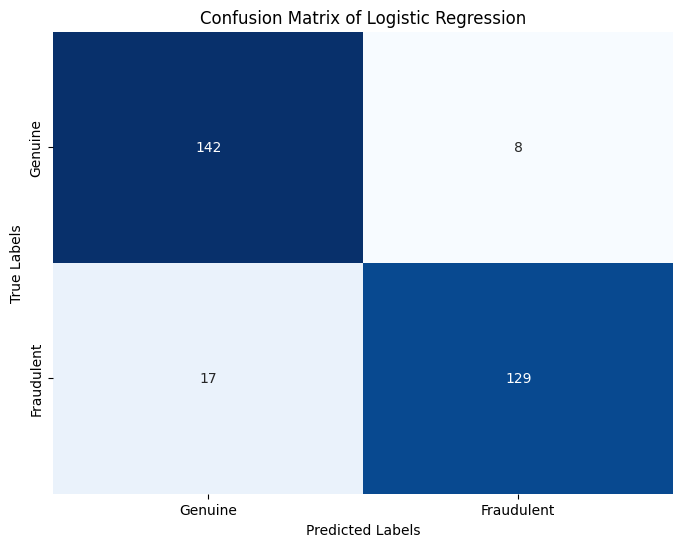

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Genuine', 'Fraudulent'],
                yticklabels=['Genuine', 'Fraudulent'])
    
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.show()

plot_confusion_matrix(y_test, y_pred_lr, title='Confusion Matrix of Logistic Regression')